# EE353 ASSIGNMENT 1
#### PRIYANSH SINGH
#### 22B1856
#### LINK TO THE EXPLANATORY VIDEO: https://drive.google.com/drive/folders/1ayvgSJ-aFHdRFEBdjGe2us7sb11WQZxK?usp=sharing

In [237]:
#data handling libraries
import pandas as pd
import numpy as np
from tabulate import tabulate

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for sql integration
from sqlalchemy import create_engine

#statistics libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Question 1

In [238]:
#imorting the csv datasets using read_csv function to pandas dataframes
df_housing = pd.read_csv('LAHD_Affordable_Housing_Projects_List__2003_to_Present_.csv')
df_restaurant = pd.read_csv('Restaurant_and_Market_Health_Inspections.csv')

# EDA and data augmentation

Useful columns:
## Restaurant dataset:  
   score, grade, facility_address(contains zip)    
## Housing dataset:  
   CONSTRUCTION TYPE, PROJECT TOTAL UNITS, HOUSING TYPE, SUPPORTIVE HOUSING, SH UNITS PER SITE, LAHD FUNDED, LEVERAGE, TAX EXEMPT CONDUIT BOND, TDC

In [239]:
#Removing the unwanted columns using df.drop function along axis = 1
df_housing = df_housing.drop(['DEVELOPER', 'MANAGEMENT COMPANY', 'CONTACT PHONE', 'PHOTO', 'JOBS', 'PROJECT SUMMARY URL', 'CONTRACT NUMBERS', 'DATE STAMP', 'SITE LONGITUDE', 'SITE LATITUDE', 'GPS_COORDS ON MAP'], axis = 1)
df_restaurant = df_restaurant.drop(['facility_name', 'service_description', 'employee_id', 'facility_city',	'facility_id', 'facility_state', 'owner_id', 'owner_name', 'pe_description', 'program_element_pe', 'program_name', 'record_id'], axis = 1)

### ZIP code extraction for the housing dataset

In [240]:
#Extracting ZIP codes from the address column in the housing dataset
zip_column = []
for i in range(len(df_housing['SITE ADDRESS'])):
    add = df_housing['SITE ADDRESS'][i]
    zip = add[len(add) - 5: len(add)] #accessing the zip, given by the last 5 digits in the address string
    zip_column.append(int(zip)) #adding this zip code to the column following the conversion to int
    
df_housing['project_zip'] = np.array(zip_column)#adding this column to the dataframe



### Range of ZIP codes for the datasets

In [241]:
#printing the unique zip codes, as there are repeating zip codes in the datasets 
print(f"Unique ZIP codes in the restaurant dataset: {np.unique(df_restaurant['facility_zip'], return_counts=True)[0]}")
#printing the number of unique zip codes, as there are repeating zip codes in the datasets 
print(f"Number of unique ZIP codes in the restaurant dataset: {len(np.unique(df_restaurant['facility_zip'], return_counts=True)[0])}")

#printing the unique zip codes, as there are repeating zip codes in the datasets 
print(f"Unique ZIP codes in the housing dataset: {np.unique(df_housing['project_zip'], return_counts=True)[0]}")
#printing the number of unique zip codes, as there are repeating zip codes in the datasets 
print(f"Number of unique ZIP codes in the housing dataset: {len(np.unique(df_housing['project_zip'], return_counts=True)[0])}")

Unique ZIP codes in the restaurant dataset: ['90001' '90001-1002' '90001-1127' ... '91602' '91604' '92880']
Number of unique ZIP codes in the restaurant dataset: 1053
Unique ZIP codes in the housing dataset: [90002 90003 90004 90005 90006 90007 90008 90011 90012 90013 90014 90015
 90016 90017 90018 90019 90020 90021 90023 90025 90026 90027 90028 90029
 90031 90032 90033 90035 90037 90038 90039 90041 90042 90043 90044 90045
 90046 90047 90057 90059 90061 90062 90063 90064 90065 90066 90068 90073
 90230 90247 90248 90291 90292 90710 90731 90732 90744 91040 91042 91303
 91306 91311 91324 91331 91335 91342 91343 91352 91364 91401 91402 91403
 91405 91406 91411 91601 91605 91606]
Number of unique ZIP codes in the housing dataset: 78


#### Converting the ZIP + 4 codes in the restaurant dataset, which are a more pinpoint way to mark locations to normal ZIP codes for analysis wiht the housing dataset 

In [242]:
for i in range(len(df_restaurant['facility_zip'])):
    if(len(df_restaurant['facility_zip'][i]) == 10): #ZIP codes are formatted as strings, and ZIP+4 values are of length 10, wheres normal ZIP codes are of length 5
       df_restaurant['facility_zip'][i] = df_restaurant['facility_zip'][i][0:5] #Trimming down the ZIP+4 codes
    
df_restaurant['facility_zip'] = df_restaurant['facility_zip'].astype(int) #string to int

C:\Users\Admin\AppData\Local\Temp\ipykernel_12140\2270741829.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_restaurant['facility_zip'][i] = df_restaurant['facility_zip'][i][0:5] #Trimming down the ZIP+4 codes
C:\Users\Admin\AppData\L

#### Checking for unique ZIP codes after the ZIP code normalization

In [243]:
#checking for the unique zip codes in the datasets after the a=zip normalization
print(f"Unique ZIP codes in the restaurant dataset (POST NORMALIZATION): {np.unique(df_restaurant['facility_zip'], return_counts=True)[0]}")
print(f"Number of unique ZIP codes in the restaurant dataset (POST NORMALIZATION): {len(np.unique(df_restaurant['facility_zip'], return_counts=True)[0])}")

print(f"Unique ZIP codes in the housing dataset: {np.unique(df_housing['project_zip'], return_counts=True)[0]}")
print(f"Number of unique ZIP codes in the housing dataset: {len(np.unique(df_housing['project_zip'], return_counts=True)[0])}")

Unique ZIP codes in the restaurant dataset (POST NORMALIZATION): [90001 90002 90003 90004 90005 90006 90007 90008 90010 90011 90012 90013
 90014 90015 90016 90017 90018 90019 90020 90021 90022 90023 90024 90025
 90026 90027 90028 90029 90030 90031 90032 90033 90034 90035 90036 90037
 90038 90039 90040 90041 90042 90043 90044 90045 90046 90047 90048 90049
 90051 90052 90053 90054 90056 90057 90058 90059 90061 90062 90063 90064
 90065 90066 90067 90068 90069 90070 90071 90077 90079 90089 90094 90095
 90103 90201 90211 90220 90222 90230 90232 90255 90272 90291 90292 90293
 90723 90921 91006 91307 91324 91325 91326 91340 91367 91401 91505 91601
 91602 91604 92880]
Number of unique ZIP codes in the restaurant dataset (POST NORMALIZATION): 99
Unique ZIP codes in the housing dataset: [90002 90003 90004 90005 90006 90007 90008 90011 90012 90013 90014 90015
 90016 90017 90018 90019 90020 90021 90023 90025 90026 90027 90028 90029
 90031 90032 90033 90035 90037 90038 90039 90041 90042 90043 90044

#### Search for NaN values

In [244]:
#replacing all the empty cells with Nan 
df_housing.replace('', np.nan, inplace=True)
df_restaurant.replace('', np.nan, inplace=True)

#[1]
nan_mask_housing = df_housing.isna() #finding nan values in the housing dataset
nan_mask_housing_indices = list(nan_mask_housing.stack()[nan_mask_housing.stack()].index) #extracting the indices of the nan cells from the nan mask
print("HOUSING DATASET NAN INDICES:")
print(nan_mask_housing_indices)
print('\n')

nan_mask_restaurant = df_restaurant.isna() #finding nan values in the restaurant dataset
nan_mask_restaurant_indices = list(nan_mask_restaurant.stack()[nan_mask_restaurant.stack()].index) #extracting the indices of the nan cells from the nan mask
print("RESTAURANT DATASET NAN INDICES:")
print(nan_mask_restaurant_indices)

HOUSING DATASET NAN INDICES:
[(4, 'CONSTRUCTION TYPE'), (8, 'DEVELOPMENT STAGE'), (8, 'DATE FUNDED'), (9, 'CONSTRUCTION TYPE'), (9, 'HOUSING TYPE'), (35, 'CONSTRUCTION TYPE'), (35, 'HOUSING TYPE'), (52, 'CONSTRUCTION TYPE'), (52, 'HOUSING TYPE'), (59, 'CONSTRUCTION TYPE'), (59, 'HOUSING TYPE'), (66, 'CONSTRUCTION TYPE'), (66, 'HOUSING TYPE'), (79, 'CONSTRUCTION TYPE'), (79, 'HOUSING TYPE'), (89, 'SITE COMMUNITY'), (118, 'CONSTRUCTION TYPE'), (118, 'HOUSING TYPE'), (133, 'SITE COMMUNITY'), (134, 'SITE COMMUNITY'), (147, 'CONSTRUCTION TYPE'), (147, 'HOUSING TYPE'), (175, 'CONSTRUCTION TYPE'), (175, 'HOUSING TYPE'), (181, 'CONSTRUCTION TYPE'), (188, 'CONSTRUCTION TYPE'), (188, 'HOUSING TYPE'), (200, 'CONSTRUCTION TYPE'), (200, 'HOUSING TYPE'), (238, 'CONSTRUCTION TYPE'), (274, 'CONSTRUCTION TYPE'), (274, 'HOUSING TYPE'), (276, 'CONSTRUCTION TYPE'), (289, 'CONSTRUCTION TYPE'), (289, 'HOUSING TYPE'), (298, 'CONSTRUCTION TYPE'), (298, 'HOUSING TYPE'), (309, 'CONSTRUCTION TYPE'), (334, 'SITE 

### Observations from the Nan values:
1. Restaurant: Only the grade column has nan/empty cells
2. Housing: Columns containing nan/empty cells: CONSTRUCTION TYPE, DEVELOPMENT STAGE, DATE FUNDED, HOUSING TYPE, SITE COMMUNITY

### Plots to understand the data

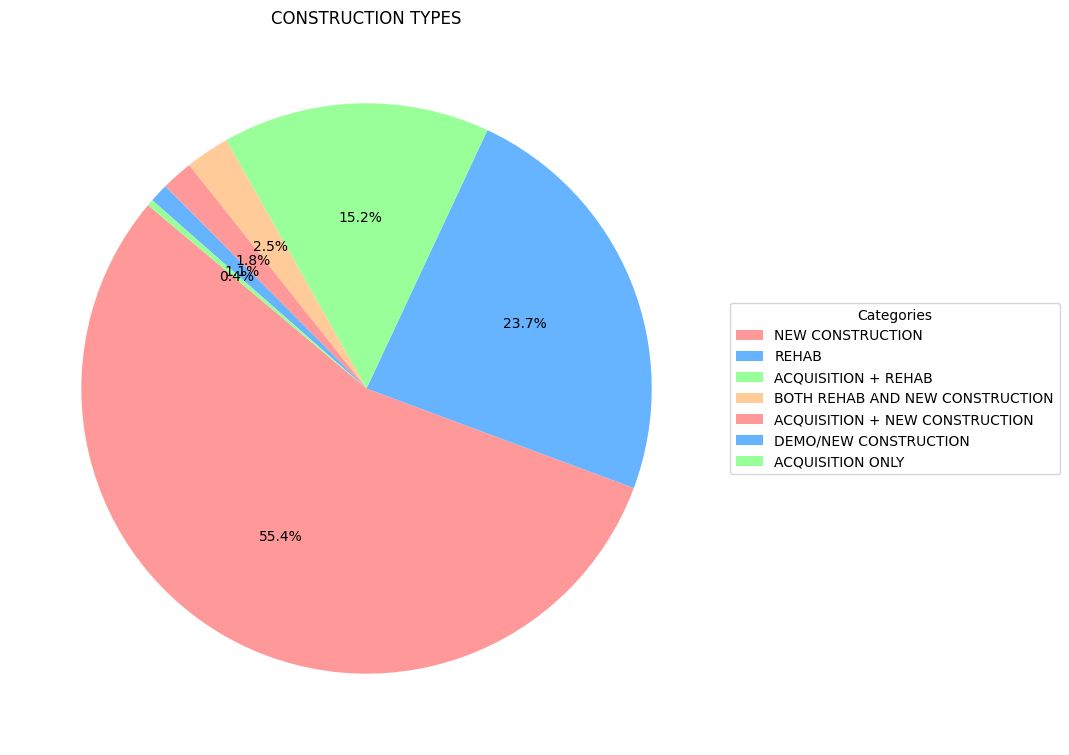

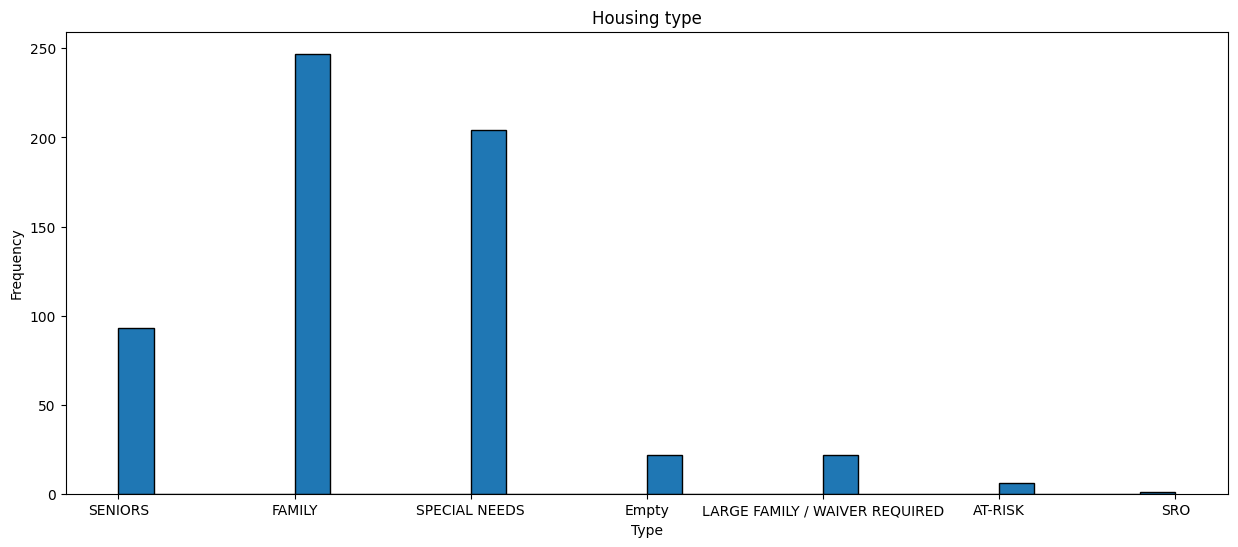

In [269]:
#COMPOSITION OF THE HOUSING DATA BY CONSTRUCTION TYPE
#[2]
#[3]
# Count the occurrences of each category in the 'CONSTRUCTION TYPE' column
category_counts = df_housing['CONSTRUCTION TYPE'].value_counts()
# Create a figure with a specified size of 10x8 inches
plt.figure(figsize=(10, 8))
# Plot a pie chart for 'CONSTRUCTION TYPE' counts with percentage labels, start angle, and custom colors
wedges, texts, autotexts = plt.pie(category_counts, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
# Add a legend to the pie chart, showing the categories on the left side with a bounding box anchor
plt.legend(wedges, category_counts.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
# Set the title for the pie chart
plt.title('CONSTRUCTION TYPES')
# Adjust the layout to prevent overlaps and ensure everything fits well within the figure
plt.tight_layout()
# Display the pie chart
plt.show()
# Fill missing values in the 'HOUSING TYPE' column with the string 'Empty'
df_housing['HOUSING TYPE'].fillna('Empty', inplace=True)
# Create a figure with a specified size of 15x6 inches for the histogram
plt.figure(figsize=(15, 6))
# Plot a histogram of 'HOUSING TYPE' data with 30 bins and black edges around the bars
plt.hist(df_housing['HOUSING TYPE'], bins=30, edgecolor='black')
# Set the title of the histogram to 'Housing type'
plt.title('Housing type')
# Label the x-axis as 'Type'
plt.xlabel('Type')
# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')
# Display the histogram
plt.show()



### SUMMARIZING BY ZIP USING SQL  
#### Restaurant dataset  
1. Score (Mean, Max, Min) 
 
#### Housing dataset  
1. Site units (Sum)   
2. Project total units (Sum)

In [218]:
#[4]
#Creating an SQL engine to implement SQL commands in python 
engine = create_engine('sqlite:///my_database.db')#creating an sql engine for running sql in python
df_restaurant.to_sql('table_restaurant', con=engine, if_exists='replace', index=False) #creating an SQL table out of the pandas dataframe
df_housing.to_sql('table_housing', con=engine, if_exists='replace', index=False) #creating an SQL table out of the pandas dataframe

595

#### Score summary for the restaurant dataset

In [219]:
#Running the neccessary commands on the table created above
#[5]
sql_command1 = '''
SELECT facility_zip, AVG(score) as average_score, MAX(score) as max_score, MIN(score) as min_score
FROM table_restaurant
GROUP BY facility_zip
ORDER BY facility_zip
'''#sql command that summarizes the columns as mentioned 
summary_1 = pd.read_sql_query(sql_command1, con=engine) #Executes the SQL query and returns a DataFrame. Con is the SQLAlchemy engine
print(tabulate(summary_1, headers = ["facility_zip", "average_score", "max_score", "min_score"]))#printing the summary as a table
df_summary1 = pd.DataFrame(summary_1)#creating a datafram eout of the summary
df_summary1.to_sql('table_1', con=engine, if_exists='replace', index=False) #creating an SQL table out of the pandas dataframe

      facility_zip    average_score    max_score    min_score
--  --------------  ---------------  -----------  -----------
 0           90001          93.845           100           71
 1           90002          94.6491          100           72
 2           90003          92.6934          100           70
 3           90004          92.8666          100           72
 4           90005          91.4269          100           65
 5           90006          92.7407          100           70
 6           90007          94.8049          100           72
 7           90008          94.1526          100           72
 8           90010          92.4369          100           70
 9           90011          93.3282          100           67
10           90012          93.4171          100           73
11           90013          94.506           100           74
12           90014          94.2181          100           75
13           90015          94.1283          100           70
14      

99

#### Total site unit and project unit summary for the housing dataset 

In [250]:
sql_command2 = '''
SELECT project_zip, SUM("SITE UNITS") as total_site_units, SUM("PROJECT TOTAL UNITS") as total_project_units, SUM("LAHD FUNDED") as total_lahd_fund, SUM("LEVERAGE") as total_leverage, SUM("TAX EXEMPT CONDUIT BOND") as total_tax_exempt, SUM("TDC") as total_spending
FROM table_housing
GROUP BY project_zip
ORDER BY project_zip
'''
summary_2 = pd.read_sql_query(sql_command2, con=engine) #Executes the SQL query and returns a DataFrame. Con is the SQLAlchemy engine
print(tabulate(summary_2, headers = ["project_zip", "total_site_units", "total_project_units", "total_lahd_fund", "total_leverage", "total_tax_exempt", "total_spending"]))#printing the summary as a table
df_summary2 = pd.DataFrame(summary_2)#creating a datafram eout of the summary
df_summary2.to_sql('table_2', con=engine, if_exists='replace', index=False) #creating an SQL table out of the pandas dataframe

      project_zip    total_site_units    total_project_units    total_lahd_fund    total_leverage    total_tax_exempt    total_spending
--  -------------  ------------------  ---------------------  -----------------  ----------------  ------------------  ----------------
 0          90002                 738                   2345        5.14938e+07       3.12669e+08         1.21793e+08       4.85956e+08
 1          90003                 808                   2468        9.58137e+07       3.91291e+08         5.60469e+07       5.43151e+08
 2          90004                 679                   1124        6.65953e+07       2.67466e+08         1.26491e+07       3.4671e+08
 3          90005                 433                    690        7.501e+06         1.14192e+08         2.10659e+07       1.42759e+08
 4          90006                1084                   2179        7.69642e+07       4.16572e+08         3.04638e+07       5.24e+08
 5          90007                 420               

78

### Joining the files using SQL by ZIP code

In [251]:
sql_command3 = '''
SELECT *
FROM table_1
INNER JOIN table_2 ON table_1.facility_zip = table_2.project_zip
'''#sql command that joins the tables with a comman column
summary_3 = pd.read_sql_query(sql_command3, con=engine) #Executes the SQL query and returns a DataFrame. Con is the SQLAlchemy engine
df_joined = pd.DataFrame(summary_3)#creating a dataframe out of the summary

In [252]:
df_joined = df_joined.drop(['facility_zip', 'project_zip'], axis = 1)#dropping the zip columns for making the heatmap

#### Correlation Heatmap for the columns:
1. average_score  
2. max_score  
3. min_score  
4. total_site_units  
5. total_project_units  
6. total_lahd_fund  
7. total_leverage  
8. total_tax_exempt  
9. total_spending  
However, we don't need to look at the correlations between the columns of the housing data itself

In [253]:
#[6]
y_columns = ['average_score', 'max_score', 'min_score']#columns from the restaurant dataset 
x_columns = ['total_site_units', 'total_project_units', 'total_lahd_fund', 'total_leverage', 'total_tax_exempt', 'total_spending']#columns from the housing dataset 

# Create an empty correlation matrix (3x6)
corr_matrix = pd.DataFrame(index=y_columns, columns=x_columns)

# Compute the correlation for each pair and fill the matrix
for y_col in y_columns:
    for x_col in x_columns:
        corr_matrix.loc[y_col, x_col] = df_joined[y_col].corr(df_joined[x_col])#calculating the correlation between the columns in the loop

# Convert values to float
corr_matrix = corr_matrix.astype(float)

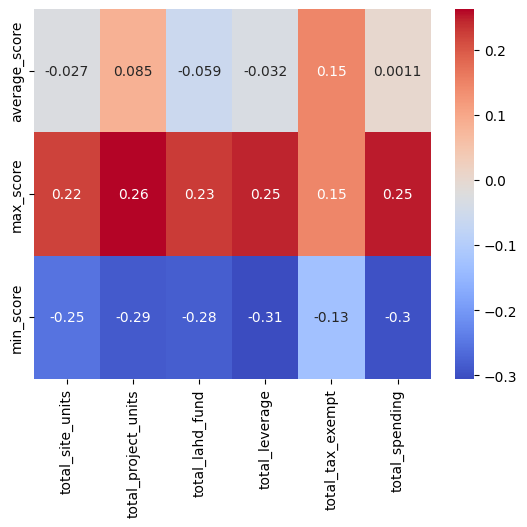

In [254]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=x_columns, yticklabels=y_columns)#heatmap of the correlation matrix using seaborn 
plt.show()

# Hypotheses and testing [7]  
### Alternate hypothesis
The statistics of affordable housing projects has a relation to the health inspection scores of the restaurants in that ZIP code  
### Null hypothesis
There is no correlation between teh datasets
### Correlation metric 
Pearson correlation coefficient
### Columns used for correlation calculation (For a given ZIP code)
##### Restaurant dataset
1. Average score
2. Maximum score
3. Minimum score
##### Housing dataset
1. total_site_units  
2. total_project_units  
3. total_lahd_fund  
4. total_leverage  
5. total_tax_exempt  
6. total_spending  
### Test statistic 
t-value for correlation = r and degrees of freedom = n - 2 : $$ t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}} $$
### Significance level and critical t-value
For a 95% conifdence level, we get the sinificance level of 0.05, and since we are using a two tailed test(testing for both positive and negative correlations), we'll use 0.05/2 = 0.025 as the significance level to reject the null hypothesis  
Looking up the t-distribution table for significance level = 0.025 and degrees of freedom = 53 - 2 = 51, we get the critical t-value as 2.31 

In [257]:
t_value_matrix = pd.DataFrame(index=y_columns, columns=x_columns)#contains the t values, the same shape as the correlation matrix

# Compute the t-value for each pair and fill the matrix
for y_col in y_columns:
    for x_col in x_columns:
        r = corr_matrix[x_col][y_col]#correlation values
        dof = df_joined.shape[0] - 2#degrees of freedom = data length - 2 
        t_value_matrix.loc[y_col, x_col] = (r/np.sqrt(1-r**2))*(dof)#t values based on the formula mentioned above


# Convert values to float
t_value_matrix = t_value_matrix.astype(float)

In [258]:
t_value_matrix#printing the tvalue matrix

total_site_units  total_project_units  total_lahd_fund  \
average_score         -1.374679             4.348353        -2.990173   
max_score             11.654082            13.892488        11.958712   
min_score            -13.368374           -15.314752       -15.041646   

               total_leverage  total_tax_exempt  total_spending  
average_score       -1.623871          7.521497        0.056382  
max_score           12.942434          7.514894       13.174170  
min_score          -16.357096         -6.620468      -15.919966

In [259]:
#constructing the hypothesis test matrix
hypo_test_matrix = pd.DataFrame(index=y_columns, columns=x_columns)

crit_t_value = 2.31#critical value of t value from the table

# Compare the t-value with the critical t-value for each pair and fill the matrix
for y_col in y_columns:
    for x_col in x_columns:
        t_val = t_value_matrix[x_col][y_col]
        if(abs(t_val) >= crit_t_value):#significant
           hypo_test_matrix.loc[y_col, x_col] = 1
        else:#insignificant
           hypo_test_matrix.loc[y_col, x_col] = 0

In [260]:
hypo_test_matrix#printing the hypothesis test resultts

total_site_units total_project_units total_lahd_fund  \
average_score                0                   1               1   
max_score                    1                   1               1   
min_score                    1                   1               1   

              total_leverage total_tax_exempt total_spending  
average_score              0                1              0  
max_score                  1                1              1  
min_score                  1                1              1

# Results
The null hypothesis holds true for the correlation between average_score, total number of site units, total amount of leverage and total spending  
There exists correlations between the Score and the number of project units, total lahd fund, total tax exempt

# Question 2

# Dataset
- All india consumer price index data from january 2013 to november 2023

In [261]:
df_cpi = pd.read_csv('All_India_CPI_Upto_Nov23.csv')#reading the dataset

# EDA 
- Observing Nan Values

In [262]:
for col in df_cpi.columns:
        nan_indices = df_cpi[df_cpi[col].isna()].index#printing the indices of the nan values in the dataframe
        print(nan_indices)

Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([258, 259, 260, 261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([258, 259, 260, 261, 262, 263], dtype='int64')
Index([261, 262, 263], dtype='int64')
Index([258, 259, 260, 261, 262, 263], dtype='int64')
Index([258, 259, 260, 261, 262, 263], dtype='int64')
Index([258, 259, 260, 261, 262, 263], dtype='int64')
Index([258, 259, 260, 261, 262, 263], dtype='int64')
Index([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,
       ...
       336, 339, 342, 345, 348, 351, 354, 357, 360, 363],
      dtype='int64', length=122)
Index([261, 262, 263], dtype='

- On observing the nan values, a very logical region containing a lot of Nan values was the months of April and May of 2020 (row numbers 258 to 263), because of the data being highly skewed owing to a decrease in sales, coupled with the difficulty of data acquisition 
- Also, the housing sector column has alternate NaN values, making the column useless for analysis

### Filling nan values
- Using the average of the prior and next row values

In [263]:
#Dropping the columns for the minths of April and May 2020
df_cpi = df_cpi.drop([258, 259, 260, 261, 262, 263])
df_cpi = df_cpi.reset_index(drop=True)
df_cpi = df_cpi.drop(['Housing'], axis = 1)

In [232]:
for col in df_cpi.columns:
    nan_indices = df_cpi[df_cpi[col].isna()].index#listing the nan iindices in the column

    for i in nan_indices:
        prev_index = i - 1#previous index
        next_index = i + 1#next index
        
        if (prev_index == -1):#if the nan value is in the first row
            if(df_cpi[col].iloc[next_index] != 'NaN'):
                df_cpi.at[i, col] = df_cpi[col].iloc[next_index]#paste the next value if it is not nan
            
        if prev_index >= 0 and next_index < len(df_cpi):# for nan index in between the top and bottom
            if((df_cpi[col].iloc[prev_index] != 'NaN') and (df_cpi[col].iloc[next_index] != 'NaN')):#avergae of next and prev  
                avg_value = (df_cpi[col].iloc[prev_index] + df_cpi[col].iloc[next_index]) / 2#average
                df_cpi.at[i, col] = avg_value
            elif((df_cpi[col].iloc[prev_index] == 'NaN') and (df_cpi[col].iloc[next_index] != 'NaN')):#if previous value is nan
                df_cpi.at[i, col] = df_cpi[col].iloc[next_index]#write the next value
            elif((df_cpi[col].iloc[prev_index] != 'NaN') and (df_cpi[col].iloc[next_index] == 'NaN')):#if next value is nan
                df_cpi.at[i, col] = df_cpi[col].iloc[prev_index]#write the prev value
        

### Checking for nan values after the above operation to check for the presence of any corner cases 

In [264]:
total_nan = 0
for col in df_cpi.columns:
        nan_indices = df_cpi[df_cpi[col].isna()].index#summing up th number of nan values
        total_nan += len(nan_indices)
print(f"Total number of nan values after the above operation: {total_nan}")#chjecking if any nan values exist due to any possible corner cases not covered in the above if conditions\

Total number of nan values after the above operation: 0


#### The above concludes that no nan values remain in the daraframe anymore
#### Plotting the pearson correlation coefficents between the columns as a heatmap 

<Axes: >

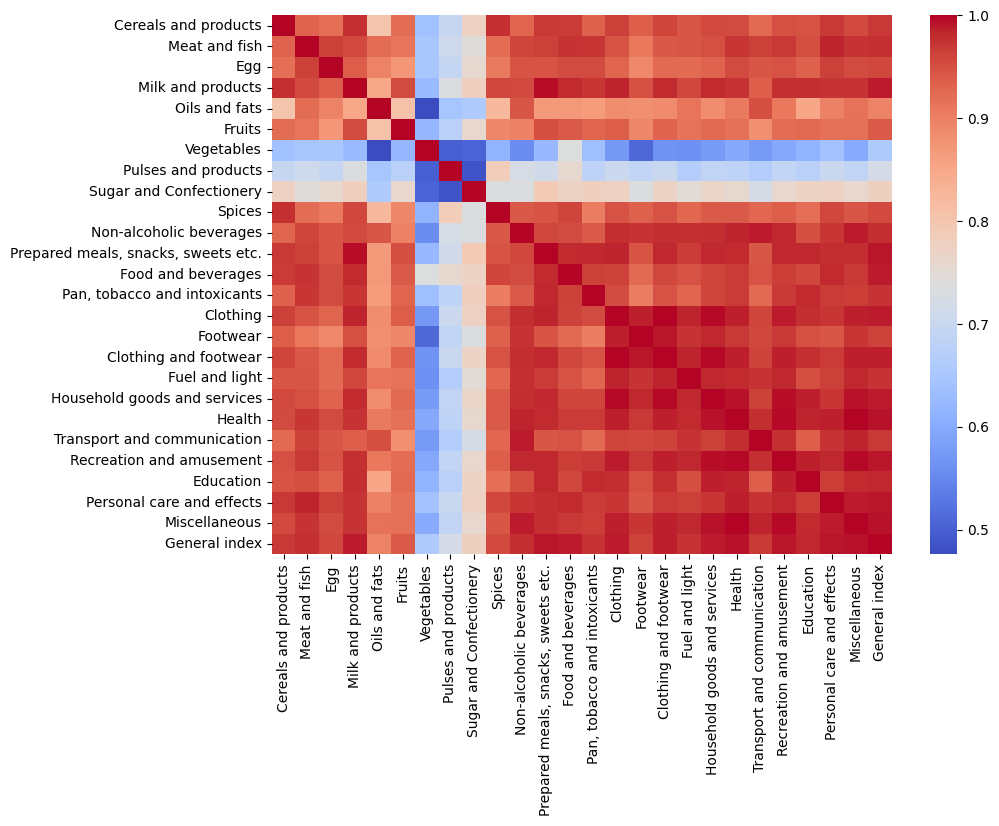

In [265]:
plt.figure(figsize=(10,7))
corr_matrix_cpi = (df_cpi.drop(['Sector', 'Year', 'Month'], axis = 1)).corr()#correlation matrix
sns.heatmap(corr_matrix_cpi, cmap='coolwarm')#heatmap

### Observations from the above heatmap: 
- Comparatively low values of correlation are observed between the categories of Vegetables, Pulses & products, Sugar & confectionary  
- These categories also show significantly low correlations with the other columns in the dataset

# Hypotheses and testing [7]  
### Alternate hypothesis
The correlations of the Vegetables, Pulses & products, Sugar & confectionary columns with the other columns are significantly lower than the correlations between the other columns
### Null hypothesis
The values are not significantly less
### Correlation metric 
Pearson correlation coefficient
### Test statistic 
ANOVA: Analysis of variance - useful particularly for the test of comparison of values in multiple columns 
### Significance level and critical t-value
For a 95% conifdence level, we get the significance level (alpha) of 0.05

### ANOVA test for the entire correlation matrix

In [266]:
#[8]
df_melted = corr_matrix_cpi.melt(var_name='Column', value_name='Value')#melting the corr matrix to a long form to make it ready for ANOVA

# Perform ANOVA
model = ols('Value ~ Column', data=df_melted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Results:")
print(anova_table)

# Interpret the results
p_value = anova_table['PR(>F)'][0]
alpha = 0.05
if p_value < alpha:#SIGNIFICANT DIFFERENCE
    print(f"ANOVA RESULT: Some columns values are significantly different (p-value = {p_value:.4f}).")
else:#INSIGNIFICANT DIFFERENCE
    print(f"ANOVA RESULT: No significantly different/outlier columns (p-value = {p_value:.4f}).")

ANOVA Results:
            sum_sq     df          F        PR(>F)
Column    4.454377   25.0  19.825138  4.883165e-64
Residual  5.841765  650.0        NaN           NaN
ANOVA RESULT: Some columns values are significantly different (p-value = 0.0000).


C:\Users\Admin\AppData\Local\Temp\ipykernel_12140\3240841139.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]


### ANOVA test for the columns other than: 'Vegetables', 'Pulses and products', 'Sugar and Confectionery' 
### If no singificant outliers are found here, it would prove that the 'Vegetables', 'Pulses and products', 'Sugar and Confectionery' have significantly low correlations with the other columns

In [267]:
#[8]
corr_matrix_cpi_dropped = corr_matrix_cpi.drop(['Vegetables', 'Pulses and products', 'Sugar and Confectionery'], axis = 1)#dropping the columns under test 
df_melted_2 = corr_matrix_cpi_dropped.melt(var_name='Column', value_name='Value')#melting it for reasins describes in the previous cell

# Perform ANOVA
model_2 = ols('Value ~ Column', data=df_melted_2).fit()
anova_table_2 = sm.stats.anova_lm(model_2, typ=2)

print("ANOVA Results:")
print(anova_table_2)

# Interpret the results
p_value = anova_table_2['PR(>F)'][0]
alpha = 0.05
if p_value < alpha:#SIGNIFICANT DIFFERENCE
    print(f"ANOVA RESULT: Some columns values are significantly different (p-value = {p_value:.4f}).")
else:#INSIGNIFICANT DIFFERENCE
    print(f"ANOVA RESULT: No significantly different/outlier columns (p-value = {p_value:.4f}).")

ANOVA Results:
            sum_sq     df         F    PR(>F)
Column    0.231983   22.0  1.167023  0.271433
Residual  5.195443  575.0       NaN       NaN
ANOVA RESULT: No significantly different/outlier columns (p-value = 0.2714).


C:\Users\Admin\AppData\Local\Temp\ipykernel_12140\2252386886.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table_2['PR(>F)'][0]


# RESULTS
- From the two ANOVA tests, one conducted on the entire correlation matrix while the other conducted on the correlation matrix with the 'Vegetables', 'Pulses and products', 'Sugar and Confectionery' columns dropped, we get the result that these columns are significantly less correlated with the other columns
- This shows how the price variations of Vegetables, pulses and confectioneries don't follow the general market trends of other commodities, which probably is because of these items being of daily use and consumption, their sale being unaffected by market events

# References:  
[1]: ChatGPT prompt: Function to find NaN values in a pandas dataframe  
[2]: ChatGPT prompt: Function to replace NaN values by a chosen string in a dataframe  
[3]: ChatGPT prompt: Making a pie chart and adding a legend to it  
[4]: ChatGPT prompt: Using SQL in python, making a table out of a pandas dataframe  
[5]: ChatGPT prompt: Executing a set of SQL commands on a table in python  
[6]: ChatGPT prompt: COnstructing a correlation matrix for correlations between certain pairs of columns in a dataframe  
[7]: TESTING STATISTICAL HYPOTHESES by E. L. Lehmann and Joseph P. Romano  
[8]: ChatGPT prompt: Doing ANOVA test in python
